<h2>Covid-19 seurantaa</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
%matplotlib inline

# Mahdollisten varoitusten piilotus
warnings.filterwarnings('ignore')

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Ajantasaisen datan nouto ecdc:n sivuilta
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'], format = '%d/%m/%Y')
df = df.drop('dateRep', axis = 1).sort_index()

df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,MKD,2077132.0,Europe,NaN
2019-12-31,31,12,2019,0,0,South_Korea,KR,KOR,51225321.0,Asia,NaN
2019-12-31,31,12,2019,0,0,Iceland,IS,ISL,356991.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Iraq,IQ,IRQ,39309789.0,Asia,NaN


In [2]:
# Funktio noutaa datasta maan tiedot (tartunnat, kuolleet, asukasluku) 
# ja esittää 7 päivän liukuvat keskiarvot viivakaaviona
def liukuva7(maa):
    
    df_maa = df[df['countriesAndTerritories'] == maa][['cases', 'deaths', 'popData2019']]
    df_maa = df_maa['2020-03':]
    
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('Tartunnat - 7 päivän liukuva', color = 'C0')
    ax1.plot(df_maa['cases'].rolling(7).mean(), color = 'C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Kuolemat - 7 päivän liukuva', color = 'C1')
    ax2.plot(df_maa['deaths'].rolling(7).mean(), color = 'C1')
    asukasluku = df_maa['popData2019'][0].astype(int).astype(str)
    ax1.set_title(maa + ' (asukasluku 2019: ' + asukasluku + ')')
    
    print(datetime.now())
    
# Neljän maan vertailu, tartuntojen ilmaantuvuus sataa tuhatta asukasta kohden
# kahdessa viikossa
def vertaa4(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    df_maa3 = df[df['countriesAndTerritories'] == maa3]
    df_maa4 = df[df['countriesAndTerritories'] == maa4]
    
    df_maa1['casesp'] = df_maa1['cases'] / (df_maa1['popData2019'] / 100000)
    df_maa2['casesp'] = df_maa2['cases'] / (df_maa2['popData2019'] / 100000)
    df_maa3['casesp'] = df_maa3['cases'] / (df_maa3['popData2019'] / 100000)
    df_maa4['casesp'] = df_maa4['cases'] / (df_maa4['popData2019'] / 100000)
    
    fig, ax = plt.subplots(figsize = (14, 6))
    ax.plot(df_maa1['casesp'].rolling(14).sum(), color = 'C0', label = maa1)
    ax.plot(df_maa2['casesp'].rolling(14).sum(), color = 'C1', label = maa2) 
    ax.plot(df_maa3['casesp'].rolling(14).sum(), color = 'C2', label = maa3)
    ax.plot(df_maa4['casesp'].rolling(14).sum(), color = 'C3', label = maa4) 
    ax.set_ylabel('Ilmaantuvuus 14 pv / 100000')
    ax.set_title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
    ax.legend()
    
    print(datetime.now())

2020-10-31 10:44:14.605229


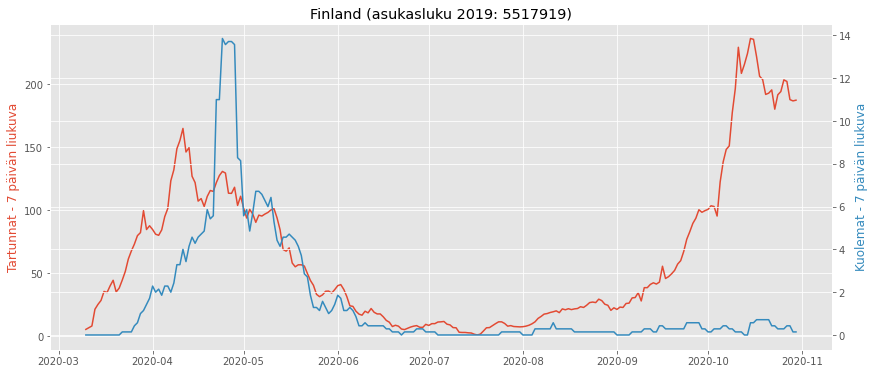

In [3]:
liukuva7('Finland')

2020-10-31 10:44:14.832084


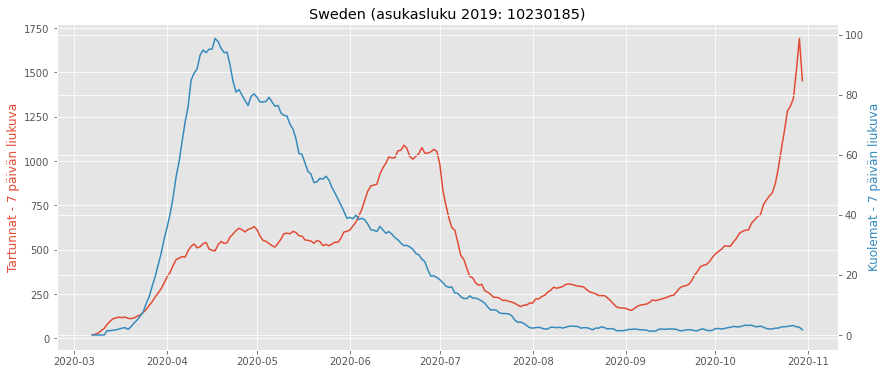

In [4]:
liukuva7('Sweden')

2020-10-31 10:44:15.024574


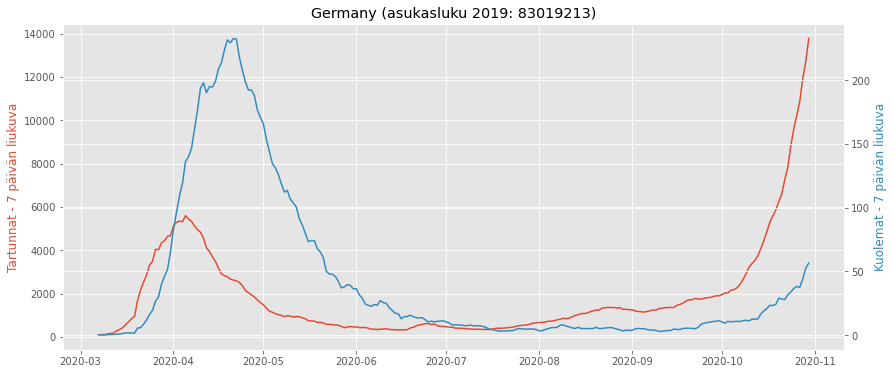

In [5]:
liukuva7('Germany')

2020-10-31 10:44:15.213202


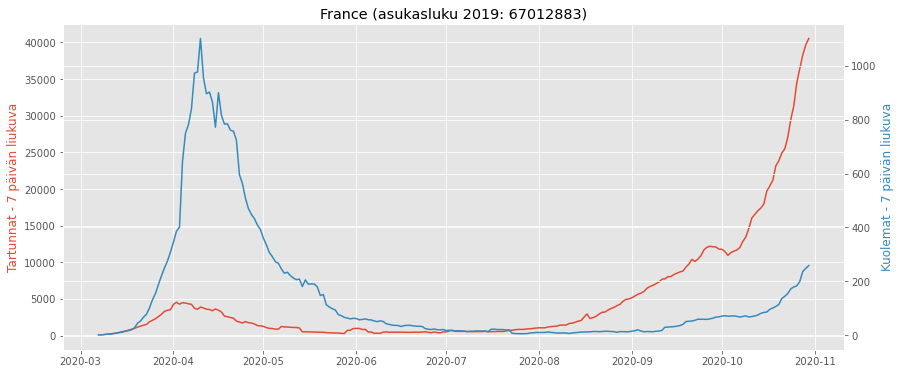

In [6]:
liukuva7('France')

2020-10-31 10:44:15.402416


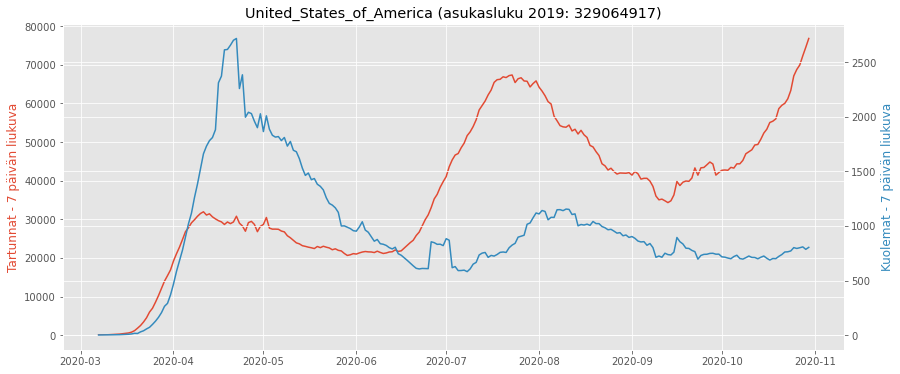

In [7]:
liukuva7('United_States_of_America')

2020-10-31 10:44:15.602907


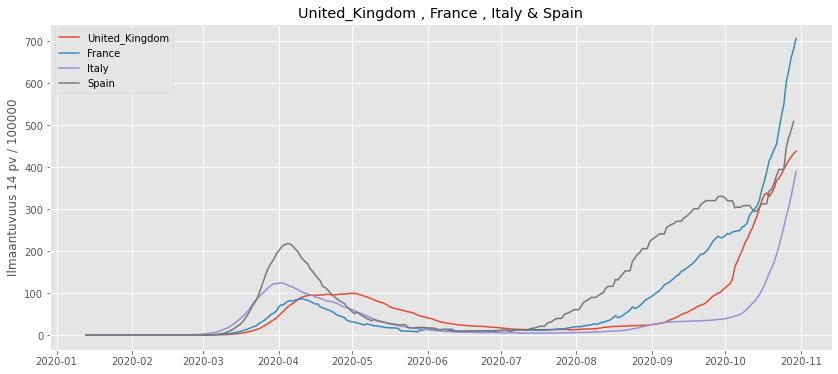

In [8]:
vertaa4('United_Kingdom', 'France', 'Italy', 'Spain')

2020-10-31 10:44:15.784663


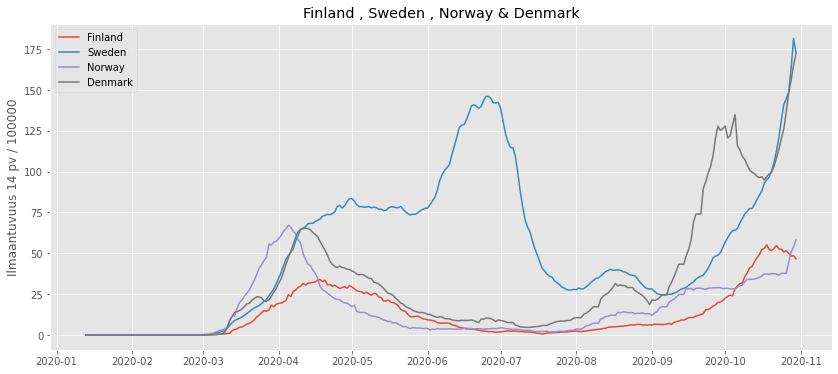

In [9]:
vertaa4('Finland', 'Sweden', 'Norway', 'Denmark')

In [10]:
# Jos haluat katsoa muiden maiden tietoja, niin kirjoita maiden nimet oikein:
list(np.sort(pd.unique(df['countriesAndTerritories'])))

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'British_Virgin_Islands',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'CuraÃ§ao',
 'Cyprus',
 'Czechia',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'F